In [62]:
import numpy as np
def distance(p1, p2):
        return np.sqrt(np.sum(np.power(p2 - p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1,p2)

4.242640687119285

In [63]:
import random

def majority_vote(votes):
    """
    Return most common element in votes.
    """    
    vote_counts = {}
    
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1

    winners = []
    max_counts = max(vote_counts.values())

    for vote, count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)
            

    return random.choice(winners)
            

votes = [1,2,3,4,5,2,2,1,1,2,3,2,2,2,2,2]

majority_vote(votes)

2

In [61]:
import scipy.stats as ss

def majority_vote_short(votes):
    """
    Return most common element in votes.
    """    
    mode, count = ss.mstats.mode(votes)
    return mode
    
votes = [1,2,3,4,5,2,2,1,1,2,3,2,2,2,2,2]

majority_vote_short(votes)

array([2.])

In [60]:
#loop over all points
    #compute the distance between point p and every other point
#sort distances and return those k points that are nearest to point p
def find_nearest_neighbours(p, points, k = 5):
    """
    Find the k nearest neighbours of point p and return their indices.
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]
    
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
print(points.shape)
p = np.array([2.5,2])

(9, 2)


(0.5, 3.5, 0.5, 3.5)

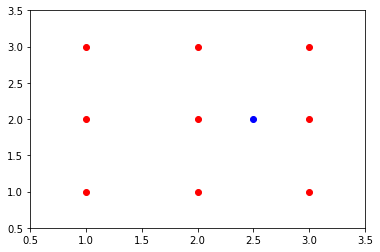

In [7]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0],p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [20]:
ind = find_nearest_neighbours(p, points, 3); print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [21]:
ind = find_nearest_neighbours(p, points); print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]
 [3 1]]


In [59]:
def knn_predict(p, points, outcomes, k):
    #find k nearest neighbours
    ind = find_nearest_neighbours(p, points, k)
    #predict the class or category of p based on majority vote
    return majority_vote(outcomes[ind])

outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [31]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=7)

1

In [34]:
knn_predict(np.array([1.0, 2.7]), points, outcomes, k=3)

0

In [58]:
ss.norm(0,1).rvs((5,2))
ss.norm(1,1).rvs((5,2))

array([[-0.42504834,  1.40545758],
       [-0.5066059 ,  0.33840595],
       [ 1.32493071, -1.27446855],
       [ 0.99610993,  0.74415185],
       [-0.28822207,  1.18568773]])

[[-1.66495787  0.92032655]
 [-1.18297442  1.04849082]
 [ 0.86858132 -0.38843677]
 [ 0.03319536  0.8524557 ]
 [-0.33813114  0.31670382]
 [-0.02989407  0.33987268]
 [ 0.85401461 -0.08250768]
 [-0.18472458 -1.24369808]
 [-3.39426578  0.14235229]
 [-0.92926173 -1.15514588]
 [ 0.87403847 -1.70368291]
 [-0.2101346  -0.12909996]
 [-0.99290354 -0.18677649]
 [ 0.00474086 -0.04382561]
 [ 0.94302629 -1.52063868]
 [ 0.40062403  0.186527  ]
 [ 0.13955208 -1.25334556]
 [-1.27113     0.87378291]
 [-0.6900105   0.93236696]
 [ 0.83612164  0.15899122]
 [ 2.25939165  1.53211717]
 [ 0.60477544 -0.27270105]
 [ 2.34280903  1.43343968]
 [ 1.7788576   0.10361738]
 [-0.43617509  1.19275207]
 [-0.52869559  2.91990731]
 [ 2.13003974  2.73410363]
 [ 1.40204264  1.30897541]
 [-0.48956612  0.41044071]
 [ 1.46797494 -0.09251844]
 [ 1.68944332  0.56597199]
 [ 1.34092285  0.47785074]
 [ 1.70152332  0.50853471]
 [ 2.0090859   1.12948401]
 [ 1.4151185   1.17336308]
 [ 0.03654     0.32995682]
 [ 0.40581544 -0.65161553]
 

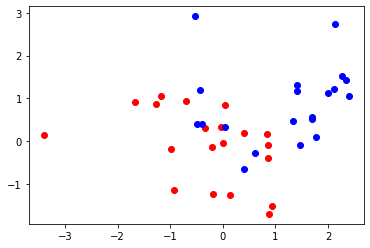

In [86]:
def generate_synth_data(n=50):
    """
    Create two sets of points from bivariate normal distribution.
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    print(points)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    print(outcomes)
    return (points, outcomes)

n = 20
(points, outcomes) = generate_synth_data(n)
plt.figure()
plt.plot(points[:n, 0],points[:n, 1], "ro")
plt.plot(points[n:, 0],points[n:, 1], "bo")

In [56]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """ Classify each point on the prediction grid. """
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    
    return (xx, yy, prediction_grid)

In [55]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [64]:
(predictors, outcomes) = generate_synth_data()
k = 5
limits = (-3, 4, -3, 4)
h = 0.1
filename = 'knn_synth_5.pdf'

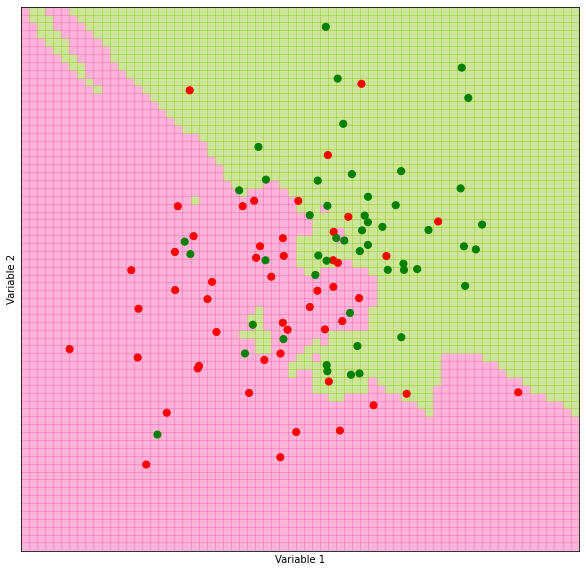

In [65]:
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

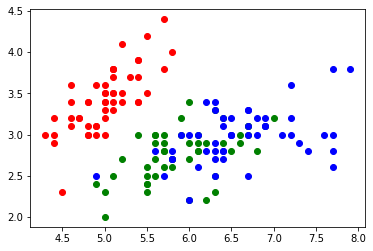

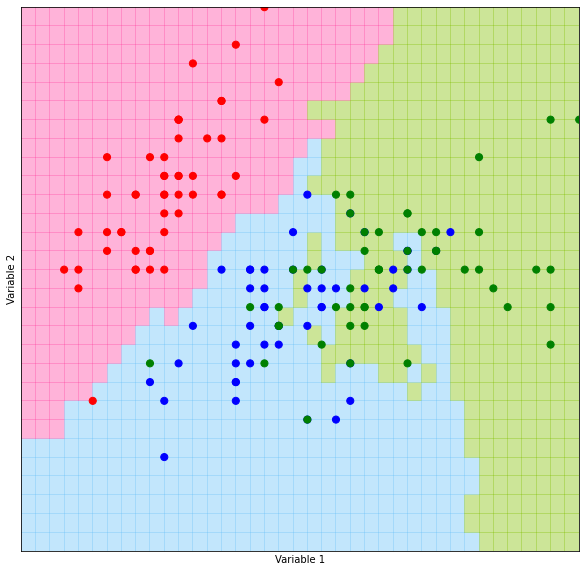

In [76]:
from sklearn import datasets
iris = datasets.load_iris()

predictors = iris.data[:, 0:2]
outcomes = iris.target
plt.plot(predictors[outcomes==0][:, 0], predictors[outcomes==0][:, 1], "ro")
plt.plot(predictors[outcomes==1][:, 0], predictors[outcomes==1][:, 1], "go")
plt.plot(predictors[outcomes==2][:, 0], predictors[outcomes==2][:, 1], "bo")

k = 5
limits = (4, 8, 1.5, 4.5)
h = 0.1
filename = 'iris_grid.pdf'
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [79]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [80]:
my_predictions.shape

(150,)

In [83]:
np.mean(sk_predictions == my_predictions) * 100

96.0

In [85]:
print(np.mean(sk_predictions == outcomes) * 100)
print(np.mean(outcomes == my_predictions) * 100)

83.33333333333334
84.66666666666667
